Adapted by Carlos Toxtli http://www.carlostoxtli.com/#colab-knn-1

Credits: https://github.com/skrzym/kNN-Visualization/blob/master/KNN%20Algorithm%20on%20Iris%20Dataset.ipynb

In [ ]:
!git clone https://github.com/skrzym/kNN-Visualization.git
%cd kNN-Visualization

Cloning into 'kNN-Visualization'...
remote: Enumerating objects: 13, done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 13
Unpacking objects: 100% (13/13), done.
/content/kNN-Visualization


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Main File for kNN (k Nearest Neighbors) Algorithm
# From http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

# Idea is to do kNN on the cars dataset

# Handle Data:  Open the dataset from CSV and split into test/train datasets.
# Similarity:   Calculate the distance between two data instances.
# Neighbors:    Locate k most similar data instances.
# Response:     Generate a response from a set of data instances.
# Accuracy:     Summarize the accuracy of predictions.
# Main:         Tie it all together.

In [ ]:
def load_data(filename, test_size=0.33):
    data = pd.read_csv(filename, header=None, names=['c1', 'c2', 'c3', 'c4', 'class'])
    train, test = train_test_split(data, test_size=test_size)
    train = train.sort_index(ascending=True)
    test = test.sort_index(ascending=True)
    return train, test

In [ ]:
def euclidean_distance(element1, element2, factors):
    ssd = 0
    for i in factors:
        ssd += (element1[i] - element2[i])**2
    e_dist = math.sqrt(ssd)
    return e_dist    

In [ ]:
def get_neighbors(training_set, test_element, k, factors):
    distances = {}
    for i, r in training_set.iterrows():
        distances[i] = (euclidean_distance(r, test_element, factors))
    sorted_distances = sorted(distances.items(), key=operator.itemgetter(1))

    index_list = []
    for i in range(k):
        index_list.append(sorted_distances[i][0])
    furthest_distance = sorted_distances[k][1]
    neighbors = training_set.loc[index_list]
    return neighbors, furthest_distance

In [ ]:
def get_response(neighbors):
    tally = neighbors['class'].value_counts()
    return tally.index.values[0]

In [ ]:
def get_accuracy(pred, test):
    correct = 0.0
    for key in pred:
        if pred[key] == test['class'].loc[key]:
            correct += 1
    return correct/len(test)

In [ ]:
def main(file, k, factors=[], test_size=0.33):
    train_set, test_set = load_data(filename=file, test_size=test_size)
    ####
    # Combine elements to condense factors from 4 -> 2 and allow 2 dimensional visualization
    train_set['x'] = train_set['c1'] + train_set['c2']
    train_set['y'] = train_set['c3'] + train_set['c4']
    test_set['x'] = test_set['c1'] + test_set['c2']
    test_set['y'] = test_set['c3'] + test_set['c4']
    ####
    predictions = {}
    for i, r in test_set.iterrows():
        current_neighbors, furthest_distance = get_neighbors(train_set, r, k, factors)
        current_response = get_response(current_neighbors)
        predictions[i] = current_response
    return get_accuracy(predictions, test_set)

In [ ]:
def test_suite():
    acc_list = []
    min_k = 10
    max_k = 10
    tests_per_k = 100
    for k in range(min_k, max_k + 1):
        test_list = []
        for test in range(tests_per_k):
            test_list.append(main('iris.data.csv', k, ['c3', 'c4'], 0.33))
            print('K:' + str(k) + '  Test:' + str(test) + '  Acc:' + str(test_list[-1]*100) + '%')
        acc_list.append(np.mean(test_list))
        print('K:', k, ' Avg:', acc_list[-1])
    fig = plt.gcf()
    ax = plt.gca()
    ax.set_xlim((0, tests_per_k + 1))
    ax.set_ylim((0.80, 1.0))
    #plt.plot(range(min_k, max_k + 1), acc_list)
    plt.plot(range(1, tests_per_k + 1), test_list)
    plt.plot(range(0, tests_per_k + 1), [acc_list[0] for i in range(tests_per_k + 1)])
    plt.show()


In [ ]:
def visual_main(file, k, factors, test_size=0.33):
    train_set, test_set = load_data(filename=file, test_size=test_size)
    ####
    # Combine elements to condense factors from 4 -> 2 and allow 2 dimensional visualization
    train_set['x'] = train_set['c1'] + train_set['c2']
    train_set['y'] = train_set['c3'] + train_set['c4']
    test_set['x'] = test_set['c1'] + test_set['c2']
    test_set['y'] = test_set['c3'] + test_set['c4']
    ####

    virg_train_set = train_set[train_set['class'] == 'Iris-virginica']
    seto_train_set = train_set[train_set['class'] == 'Iris-setosa']
    vers_train_set = train_set[train_set['class'] == 'Iris-versicolor']

    fig = plt.figure(figsize=(10,7))
    fig.suptitle('Iris Data KNN with k = ' + str(k) + ' test size = ' + str(test_size) + '%', fontsize=20)
    ax = plt.gca()
    # max_val = math.ceil(max([max(train_set[0]+train_set[1]), max(train_set[2]+train_set[3])]))
    # min_val = math.floor(min([min(train_set[0]+train_set[1]), min(train_set[2]+train_set[3])]))
    ax.set_xlim((2, 16))
    ax.set_ylim((1, 10))

    colors = {'Iris-virginica': 'b', 'Iris-setosa': 'c', 'Iris-versicolor': 'y', 'correct': 'g', 'wrong': 'r'}
    point_size = 150
    ax.scatter(virg_train_set['x'], virg_train_set['y'], s=point_size, c=colors['Iris-virginica'])
    ax.scatter(seto_train_set['x'], seto_train_set['y'], s=point_size, c=colors['Iris-setosa'])
    ax.scatter(vers_train_set['x'], vers_train_set['y'], s=point_size, c=colors['Iris-versicolor'])
    
    predictions = {}
    for i, r in test_set.iterrows():
        current_neighbors, furthest_distance = get_neighbors(train_set, r, k, factors)
        current_response = get_response(current_neighbors)
        predictions[i] = current_response
        #print("> predicted=", repr(current_response), "actual=", repr(r[4]))
        
        if current_response == r['class']:
            ax.scatter(r['x'], r['y'], s=point_size, c=colors['correct'], edgecolor=colors['correct'])
            ax.scatter(r['x'], r['y'], s=point_size/3, c=colors[current_response], edgecolor=colors['correct'])
            #Next two lines add distance circles for correct predictions
            #circle = plt.Circle((r['x'], r['y']), furthest_distance, fill=False, edgecolor=colors['correct'])
            #ax.add_artist(circle)
        else:
            ax.scatter(r['x'], r['y'], s=point_size, c=colors['wrong'], edgecolor=colors['wrong'])
            ax.scatter(r['x'], r['y'], s=point_size/3, c=colors[current_response], edgecolor=colors[current_response])
            #Next two lines add distance circles for incorrect predictions
            circle = plt.Circle((r['x'], r['y']), furthest_distance, fill=False, edgecolor=colors['wrong'])
            ax.add_artist(circle)
        
    print('Accuracy:',str(get_accuracy(predictions, test_set) * 100) + '%' )

    plt.show()

    #return get_accuracy(predictions, test_set)

Accuracy: 92.0%


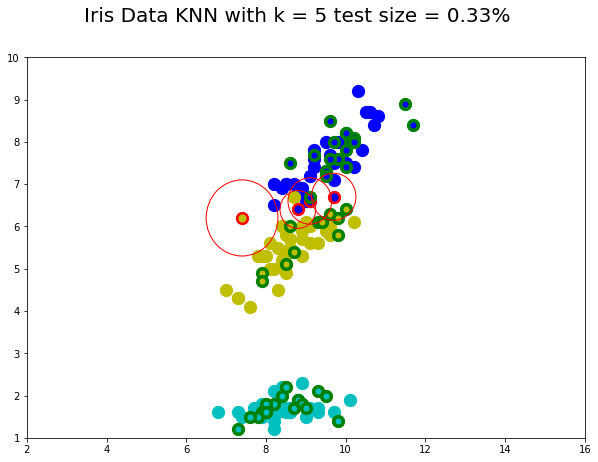

In [ ]:
visual_main('iris.data.csv', 5, ['c1','c2','c3','c4'], 0.33)

In [ ]:
# Normalization of c1 - c4
load_data('iris.data.csv')
raw_data = pd.read_csv('iris.data.csv', header=None, names=['c1', 'c2', 'c3', 'c4', 'class'])


From the wikipedia article on [**Feature Scaling**](https://en.wikipedia.org/wiki/Feature_scaling)

>The simplest method is rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula is given as:

>$$x' = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)}$$

In [ ]:
def normalize(vector):
    minimum = min(vector)
    maximum = max(vector)
    standard_form = list(vector)
    normalized_form = []
    for value in standard_form:
        normalized_form.append((value - minimum) / (maximum - minimum))
    return normalized_form

normalize(raw_data.c4)  

raw_data['n1'] = normalize(raw_data.c1)
raw_data['n2'] = normalize(raw_data.c2)
raw_data['n3'] = normalize(raw_data.c3)
raw_data['n4'] = normalize(raw_data.c4)
raw_data.head(10)
    

,c1,c2,c3,c4,class,n1,n2,n3,n4
0,5.1,3.5,1.4,0.2,Iris-setosa,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,Iris-setosa,0.166667,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,Iris-setosa,0.111111,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,Iris-setosa,0.083333,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,Iris-setosa,0.194444,0.666667,0.067797,0.041667
5,5.4,3.9,1.7,0.4,Iris-setosa,0.305556,0.791667,0.118644,0.125000
6,4.6,3.4,1.4,0.3,Iris-setosa,0.083333,0.583333,0.067797,0.083333
7,5.0,3.4,1.5,0.2,Iris-setosa,0.194444,0.583333,0.084746,0.041667
8,4.4,2.9,1.4,0.2,Iris-setosa,0.027778,0.375000,0.067797,0.041667
9,4.9,3.1,1.5,0.1,Iris-setosa,0.166667,0.458333,0.084746,0.000000


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
Xtrain, Xtest, ytrain, ytest  = train_test_split(iris.data, iris.target,  test_size=0.33)
clf = KNeighborsClassifier(5).fit(Xtrain, ytrain)
pred = clf.predict(Xtest)
print(accuracy_score(pred, ytest))

0.94


In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
Xtrain, Xtest, ytrain, ytest  = train_test_split(iris.data, iris.target,  test_size=0.33)
clf = SVC().fit(Xtrain, ytrain)
pred = clf.predict(Xtest)
print(accuracy_score(pred, ytest))

0.96


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
